# Taking a Look at the Graduates of Medical Schools and All Residency Program Applicants

In [1]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pySankey.sankey import sankey
import re
from datetime import datetime, timedelta
import time
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

# Read in Data and Merge
This is number of medical school graduates and number of psychiatry residents

In [2]:
df=pd.read_csv('tabula-totals_2018.csv',thousands=',')

In [3]:
top_ten=df.sort_values('total',ascending=False).head(10)

In [4]:
top_ten

,specialty,native american,asian,black,hispanic,native hawaiian,white,other,multiple race/ethnicity,unknown race/ethnicity,non-citizen or permanent resident,total
10,Internal Medicine,8,2258,593,526,3,3947,199,638,85,170,8427
45,Transitional Year,6,845,208,220,0,1670,77,274,44,67,3411
43,Surgery-General,12,612,264,220,2,1626,69,307,31,63,3206
7,Family Medicine,10,507,383,223,3,1531,56,272,14,46,3045
29,Pediatrics,4,498,201,147,0,1375,41,190,17,25,2498
4,Emergency Medicine,3,316,173,147,1,1330,36,181,18,16,2221
0,Anesthesiology,5,440,171,114,1,845,39,157,17,33,1822
38,Psychiatry,2,356,134,118,1,781,39,151,13,20,1615
24,Obstetrics and Gynecology,1,193,172,89,1,792,16,124,9,18,1415
42,Radiology-Diagnostic,1,340,79,88,0,647,34,112,12,26,1339


In [5]:
# df.total=df.total.str.replace(',','').astype(float)

# Manipulate into Long Data for Sankey
Using application numbers as sankey weights

In [6]:
sank=pd.melt(top_ten, id_vars=['specialty'], value_vars=top_ten.columns[1:-1])

In [7]:
sank

,specialty,variable,value
0,Internal Medicine,native american,8
1,Transitional Year,native american,6
2,Surgery-General,native american,12
3,Family Medicine,native american,10
4,Pediatrics,native american,4
5,Emergency Medicine,native american,3
6,Anesthesiology,native american,5
7,Psychiatry,native american,2
8,Obstetrics and Gynecology,native american,1
9,Radiology-Diagnostic,native american,1


In [8]:
sank=sank[sank['variable']!= 'Total']

In [9]:
sank.to_csv('sank_total.csv',index=False)

In [10]:
#casting sankey weights
weight = sank['value'].values.astype(float)


In [11]:
sank

,specialty,variable,value
0,Internal Medicine,native american,8
1,Transitional Year,native american,6
2,Surgery-General,native american,12
3,Family Medicine,native american,10
4,Pediatrics,native american,4
5,Emergency Medicine,native american,3
6,Anesthesiology,native american,5
7,Psychiatry,native american,2
8,Obstetrics and Gynecology,native american,1
9,Radiology-Diagnostic,native american,1


# Sankey Chart!

In [12]:
import pySankey
print(pySankey.__file__)

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pySankey/__init__.py


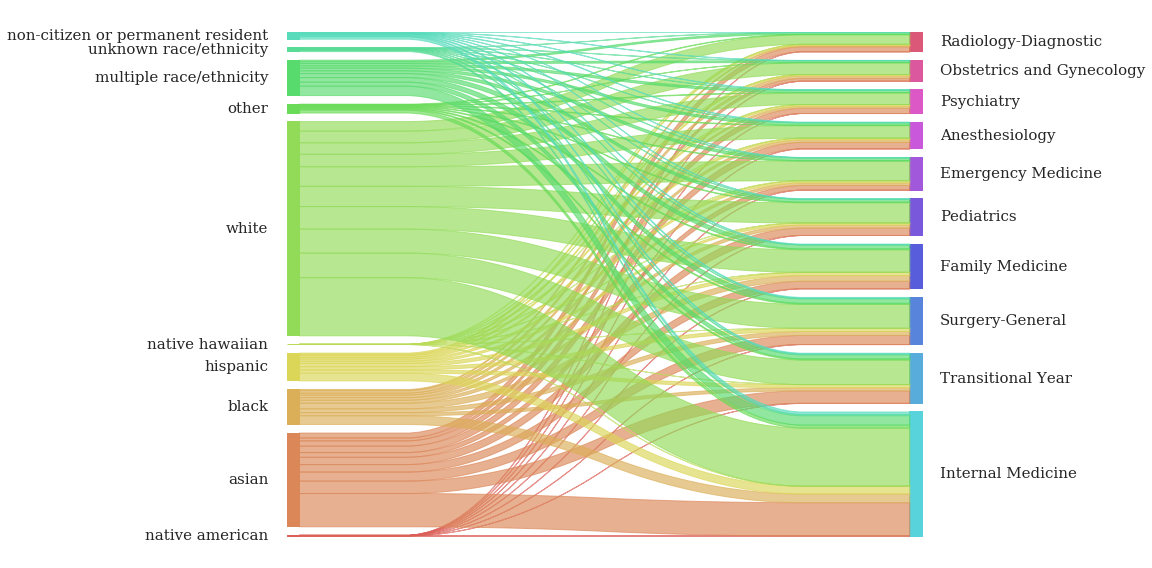

In [15]:
#why does this export without my whole fig
matplotlib.rcParams['pdf.fonttype'] = 42

#making the sankey
sankey(left=sank['variable'].values, right=sank['specialty'].values,
               rightWeight=weight, leftWeight=weight, aspect=40, fontsize=15,
               figure_name='residency flows')
# s.fig.set_size_inches(15,15)

plt.tight_layout()
plt.savefig("all_residency.pdf")